In [1]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

In [2]:
!pip install -q scann

In [3]:
from typing import Dict, Text

import os
import pprint
import tempfile

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
import tensorflow_recommenders as tfrs

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.sparse as sp
from scipy.sparse import vstack
from scipy import sparse
from scipy.sparse.linalg import spsolve

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from pathlib import Path
import pandas as pd
import numpy as np
import random
from IPython.display import Image
from IPython.core.display import HTML 
import pdb;

from subprocess import check_output
from sklearn.model_selection import train_test_split
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

# Importing Libraries and cookbooks
from recsys import *## recommender system cookbook
#from generic_preprocessing import * ## pre-processing code
from IPython.display import HTML ## Setting display options for Ipython Notebook
from itertools import combinations, chain, product

In [6]:
demo = pd.read_csv("demo001.csv",sep="|")

demo.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID_CTE,FECHA_NAC,GENERO,EDO_CIVIL,D_EDO,DESC_D_EDO,D_NC,DESC_D_NC,TP_HOGAR,T_HOGAR,...,FECHADIFCOBRO,SDOCTAPERDIDA,FECHACORTE,TIPOTELEFONO,NUMEROTELEFONOORIGEN,NUMEROTELEFONO,CARRIER,DES_CORREOELECTRONICO,DES_ORIGEN,SAMPLING
0,2746824,1952-09-22 00:00:00.000000,F,C,9.0,AGUASCALIENTES,36.0,AGUASCALIENTES,P,1988-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,1.0,9.130889e+06,4.499131e+09,0.0,CONCHITAGUILAR2@GMAIL.COM,Coppel.com en tienda,0.004464
1,6572723,1958-11-04 00:00:00.000000,F,C,10.0,JALISCO,67.0,TONALA,P,1992-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,4.0,6.170833e+06,3.336171e+09,0.0,MOGLEZZB1102@HOTMAIL.COM,Tienda,0.005916
2,12334731,1980-03-14 00:00:00.000000,M,C,23.0,VERACRUZ,40.0,CORDOBA,R,2012-01-01 00:00:00.000000,...,2011-08-31 00:00:00.000000,0.0,2020-07-31 00:00:00.000000,1.0,2.711111e+09,2.711111e+09,0.0,JORGECONTRERAS_08@HOTMAIL.COM,Tienda,0.003026
3,12408172,1968-02-19 00:00:00.000000,M,S,18.0,PUEBLA,85.0,ATLIXCO,P,2007-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,1.0,0.000000e+00,2.444463e+09,0.0,MARIO_1018@HOTMAIL.COM,Coppel.com,0.002311
4,24428035,1950-03-18 00:00:00.000000,M,D,25.0,DISTRITO FEDERAL,107.0,IZTAPALAPA,F,2003-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,3.0,5.541973e+09,5.541973e+09,0.0,BARBIE_COMEX@HOTMAIL.COM,CAT,0.008750
5,42979358,1963-10-12 00:00:00.000000,M,S,15.0,ZACATECAS,273.0,SOMBRERETE,P,1978-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,2.0,4.331055e+09,4.331055e+09,39.0,B.LINDA.MORALES@GMAIL.COM,Tienda,0.007626
6,49727061,1970-02-17 00:00:00.000000,F,C,4.0,BAJA CALIFORNIA NORTE,64.0,ENSENADA,P,2010-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,2.0,5.562271e+09,5.562271e+09,39.0,LOLISMAGA_24@HOTMAIL.COM,Tienda,0.006580
7,26835752,1984-06-14 00:00:00.000000,F,C,23.0,VERACRUZ,183.0,TUXPAN,P,2013-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,2.0,7.681044e+09,7.681044e+09,39.0,NaN,NaN,0.007558
8,25066445,1974-10-12 00:00:00.000000,F,C,22.0,HIDALGO,316.0,MINERAL DE LA R,P,2019-12-09 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,2.0,5.520714e+09,5.520714e+09,39.0,NaN,NaN,0.009830
9,46495652,1986-11-02 00:00:00.000000,M,S,31.0,OAXACA,384.0,LOMA BONITA,P,2004-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,5.0,2.871169e+09,2.871169e+09,0.0,NaN,NaN,0.002984


In [7]:
from datetime import datetime
from datetime import date

In [8]:
demo["Fecha_Nac"]=pd.to_datetime(demo["FECHA_NAC"], format='%Y-%m-%d %H:%M')
demo["Fecha_Nac"].head(5)

0   1952-09-22
1   1958-11-04
2   1980-03-14
3   1968-02-19
4   1950-03-18
Name: Fecha_Nac, dtype: datetime64[ns]

In [9]:
hoy=datetime.now().year
def age(fecnan):
    return (hoy-fecnan.year)

demo["Edad"]=demo["Fecha_Nac"].apply(age)
demo["Edad"].head(5)

0    69.0
1    63.0
2    41.0
3    53.0
4    71.0
Name: Edad, dtype: float64

In [10]:
demo["edad"]=pd.cut(demo['Edad'], [0,25,35,45,55,65,90]).astype(str)
demo.head()

,ID_CTE,FECHA_NAC,GENERO,EDO_CIVIL,D_EDO,DESC_D_EDO,D_NC,DESC_D_NC,TP_HOGAR,T_HOGAR,...,TIPOTELEFONO,NUMEROTELEFONOORIGEN,NUMEROTELEFONO,CARRIER,DES_CORREOELECTRONICO,DES_ORIGEN,SAMPLING,Fecha_Nac,Edad,edad
0,2746824,1952-09-22 00:00:00.000000,F,C,9.0,AGUASCALIENTES,36.0,AGUASCALIENTES,P,1988-01-01 00:00:00.000000,...,1.0,9.130889e+06,4.499131e+09,0.0,CONCHITAGUILAR2@GMAIL.COM,Coppel.com en tienda,0.004464,1952-09-22,69.0,"(65.0, 90.0]"
1,6572723,1958-11-04 00:00:00.000000,F,C,10.0,JALISCO,67.0,TONALA,P,1992-01-01 00:00:00.000000,...,4.0,6.170833e+06,3.336171e+09,0.0,MOGLEZZB1102@HOTMAIL.COM,Tienda,0.005916,1958-11-04,63.0,"(55.0, 65.0]"
2,12334731,1980-03-14 00:00:00.000000,M,C,23.0,VERACRUZ,40.0,CORDOBA,R,2012-01-01 00:00:00.000000,...,1.0,2.711111e+09,2.711111e+09,0.0,JORGECONTRERAS_08@HOTMAIL.COM,Tienda,0.003026,1980-03-14,41.0,"(35.0, 45.0]"
3,12408172,1968-02-19 00:00:00.000000,M,S,18.0,PUEBLA,85.0,ATLIXCO,P,2007-01-01 00:00:00.000000,...,1.0,0.000000e+00,2.444463e+09,0.0,MARIO_1018@HOTMAIL.COM,Coppel.com,0.002311,1968-02-19,53.0,"(45.0, 55.0]"
4,24428035,1950-03-18 00:00:00.000000,M,D,25.0,DISTRITO FEDERAL,107.0,IZTAPALAPA,F,2003-01-01 00:00:00.000000,...,3.0,5.541973e+09,5.541973e+09,0.0,BARBIE_COMEX@HOTMAIL.COM,CAT,0.008750,1950-03-18,71.0,"(65.0, 90.0]"


In [11]:
demo["NDepen"]=demo['N_D_EC'].apply(lambda x: 0 if x == 0 else 1).astype(str)
demo.head()

,ID_CTE,FECHA_NAC,GENERO,EDO_CIVIL,D_EDO,DESC_D_EDO,D_NC,DESC_D_NC,TP_HOGAR,T_HOGAR,...,NUMEROTELEFONOORIGEN,NUMEROTELEFONO,CARRIER,DES_CORREOELECTRONICO,DES_ORIGEN,SAMPLING,Fecha_Nac,Edad,edad,NDepen
0,2746824,1952-09-22 00:00:00.000000,F,C,9.0,AGUASCALIENTES,36.0,AGUASCALIENTES,P,1988-01-01 00:00:00.000000,...,9.130889e+06,4.499131e+09,0.0,CONCHITAGUILAR2@GMAIL.COM,Coppel.com en tienda,0.004464,1952-09-22,69.0,"(65.0, 90.0]",0
1,6572723,1958-11-04 00:00:00.000000,F,C,10.0,JALISCO,67.0,TONALA,P,1992-01-01 00:00:00.000000,...,6.170833e+06,3.336171e+09,0.0,MOGLEZZB1102@HOTMAIL.COM,Tienda,0.005916,1958-11-04,63.0,"(55.0, 65.0]",1
2,12334731,1980-03-14 00:00:00.000000,M,C,23.0,VERACRUZ,40.0,CORDOBA,R,2012-01-01 00:00:00.000000,...,2.711111e+09,2.711111e+09,0.0,JORGECONTRERAS_08@HOTMAIL.COM,Tienda,0.003026,1980-03-14,41.0,"(35.0, 45.0]",1
3,12408172,1968-02-19 00:00:00.000000,M,S,18.0,PUEBLA,85.0,ATLIXCO,P,2007-01-01 00:00:00.000000,...,0.000000e+00,2.444463e+09,0.0,MARIO_1018@HOTMAIL.COM,Coppel.com,0.002311,1968-02-19,53.0,"(45.0, 55.0]",0
4,24428035,1950-03-18 00:00:00.000000,M,D,25.0,DISTRITO FEDERAL,107.0,IZTAPALAPA,F,2003-01-01 00:00:00.000000,...,5.541973e+09,5.541973e+09,0.0,BARBIE_COMEX@HOTMAIL.COM,CAT,0.008750,1950-03-18,71.0,"(65.0, 90.0]",0


In [12]:
df_demo=demo.loc[:,('ID_CTE', "GENERO", 'EDO_CIVIL',"edad","NDepen","TP_HOGAR")]
df_demo["user_id"]=df_demo["ID_CTE"].astype(str)
df_demo.head(10)

,ID_CTE,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR,user_id
0,2746824,F,C,"(65.0, 90.0]",0,P,2746824
1,6572723,F,C,"(55.0, 65.0]",1,P,6572723
2,12334731,M,C,"(35.0, 45.0]",1,R,12334731
3,12408172,M,S,"(45.0, 55.0]",0,P,12408172
4,24428035,M,D,"(65.0, 90.0]",0,F,24428035
5,42979358,M,S,"(55.0, 65.0]",1,P,42979358
6,49727061,F,C,"(45.0, 55.0]",1,P,49727061
7,26835752,F,C,"(35.0, 45.0]",0,P,26835752
8,25066445,F,C,"(45.0, 55.0]",0,P,25066445
9,46495652,M,S,"(25.0, 35.0]",1,P,46495652


In [13]:
tran = pd.read_csv("transactional001.csv",sep="|")

tran.head(10)

,ID_CTE,FECHA_TICKET,ID_TIENDA,ID_TICKET,PROD_SKU,PROD_DEP,DESC_PROD_DEP,PROD_CLAS,DESC_PROD_CLAS,PROD_FAM,DESC_PROD_FAM,PROD_AREA,PROD_CATEGORIA,DESC_PROD_CATEGORIA,IMPORTE_VTA,CANTIDAD_VTA,PROD_PRECIO_PROMEDIO,TIPOCOMPRA,FECHACORTE
0,145035,2017-10-02 00:00:00.000000,3,133548,-99,-99,Sin Descripcion,-99,Sin Descripcion,-99,Sin Descripcion,Prestamos,-99,Sin Descripcion,3448.00,1,3448.00,Credito,2017-10-31 00:00:00.000000
1,145035,2018-05-08 00:00:00.000000,1252,7400,-99,-99,Sin Descripcion,-99,Sin Descripcion,-99,Sin Descripcion,Prestamos,-99,Sin Descripcion,5646.00,1,5646.00,Credito,2018-05-31 00:00:00.000000
2,145035,2019-08-23 00:00:00.000000,3,48708,215063,2,ELECTRONICA,24,TELEFONOS CELULARES,85,AT.T,Muebles,1,Celulares,2154.32,1,2154.32,Credito,2019-08-31 00:00:00.000000
3,145035,2019-09-20 00:00:00.000000,5,23998,800404,8,ZAPATERIA,60,ZAPATO DAMA T 22.5-27,48,SENORA CONFORT,Ropa,17,Zapato Dama,603.00,1,603.00,Credito,2019-09-30 00:00:00.000000
4,145035,2020-01-13 00:00:00.000000,2,171365,-99,-99,Sin Descripcion,-99,Sin Descripcion,-99,Sin Descripcion,Prestamos,-99,Sin Descripcion,17241.00,1,17241.00,Credito,2020-01-31 00:00:00.000000
5,558561,2017-03-17 00:00:00.000000,119,505516,340634,3,MUEBLE SUELTO,30,JARDIN,11,MESA PLEGABLE,Muebles,3,Hogar,1119.83,1,1119.83,Credito,2017-03-31 00:00:00.000000
6,558561,2017-10-17 00:00:00.000000,119,526127,236785,2,ELECTRONICA,29,CHIPS CELULARES,11,CHIP 4G MULTIFORMATO,Muebles,1,Celulares,0.00,1,0.00,Contado,2017-10-31 00:00:00.000000
7,558561,2017-10-17 00:00:00.000000,119,526127,236905,2,ELECTRONICA,95,ACCESORIOS CELULARES,2,MICAS,Muebles,1,Celulares,128.45,1,128.45,Credito,2017-10-31 00:00:00.000000
8,558561,2017-10-17 00:00:00.000000,119,526127,253311,2,ELECTRONICA,24,TELEFONOS CELULARES,9,TELCEL R2,Muebles,1,Celulares,2671.55,1,2671.55,Credito,2017-10-31 00:00:00.000000
9,558561,2017-10-17 00:00:00.000000,119,526127,296475,2,ELECTRONICA,95,ACCESORIOS CELULARES,27,PROTECTOR DE PANTALLA VIDRIO,Muebles,1,Celulares,171.55,1,171.55,Credito,2017-10-31 00:00:00.000000


In [14]:
df_tran=tran[((tran["PROD_AREA"]=="Muebles")  | (tran["PROD_AREA"]=="Ropa"))&((tran["IMPORTE_VTA"]>100))]


In [15]:
df_tran["area"]=df_tran["PROD_AREA"].apply(lambda x: 1 if x == 'Ropa' else 2) 
df_tran["fam"]=df_tran["area"].astype(str)+df_tran["PROD_DEP"].astype(str)+df_tran["PROD_CLAS"].astype(str).str.zfill(2)+df_tran["PROD_FAM"].astype(str).str.zfill(3)
df_tran["clas"]=df_tran["area"].astype(str)+df_tran["PROD_DEP"].astype(str)+df_tran["PROD_CLAS"].astype(str).str.zfill(2)
df_tran["idclas"]=df_tran["clas"]
df_tran["idfam"]=df_tran["fam"]
df_tran["movie_id"]=df_tran["fam"].astype(str)#df_tran["DESC_PROD_DEP"]#
df_tran["user_id"]=df_tran["ID_CTE"].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [16]:
df_f=df_tran.loc[:,('user_id', 'FECHA_TICKET', 'movie_id')].groupby(['user_id',"movie_id"]).size().reset_index()
df_f.head(10)

,user_id,movie_id,0
0,10000040,1105068,1
1,10000040,1204616,1
2,10000040,1701216,1
3,10000040,1863254,2
4,10000212,1106055,3
5,10000212,1867308,2
6,10000212,1869214,1
7,10000212,2224057,1
8,10000292,1101650,1
9,10000292,1312150,1


In [17]:
df_f1=df_f[:50000]

In [18]:
dff1=pd.merge(df_f1, df_demo, on='user_id', how='inner')

dff1.head(10)

,user_id,movie_id,0,ID_CTE,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,10000040,1105068,1,10000040,M,S,"(35.0, 45.0]",0,P
1,10000040,1204616,1,10000040,M,S,"(35.0, 45.0]",0,P
2,10000040,1701216,1,10000040,M,S,"(35.0, 45.0]",0,P
3,10000040,1863254,2,10000040,M,S,"(35.0, 45.0]",0,P
4,10000212,1106055,3,10000212,M,S,"(35.0, 45.0]",0,P
5,10000212,1867308,2,10000212,M,S,"(35.0, 45.0]",0,P
6,10000212,1869214,1,10000212,M,S,"(35.0, 45.0]",0,P
7,10000212,2224057,1,10000212,M,S,"(35.0, 45.0]",0,P
8,10000292,1101650,1,10000292,M,U,"(45.0, 55.0]",1,P
9,10000292,1312150,1,10000292,M,U,"(45.0, 55.0]",1,P


In [19]:
df_1=dff1.dropna() 
df_1.head(10)

,user_id,movie_id,0,ID_CTE,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,10000040,1105068,1,10000040,M,S,"(35.0, 45.0]",0,P
1,10000040,1204616,1,10000040,M,S,"(35.0, 45.0]",0,P
2,10000040,1701216,1,10000040,M,S,"(35.0, 45.0]",0,P
3,10000040,1863254,2,10000040,M,S,"(35.0, 45.0]",0,P
4,10000212,1106055,3,10000212,M,S,"(35.0, 45.0]",0,P
5,10000212,1867308,2,10000212,M,S,"(35.0, 45.0]",0,P
6,10000212,1869214,1,10000212,M,S,"(35.0, 45.0]",0,P
7,10000212,2224057,1,10000212,M,S,"(35.0, 45.0]",0,P
8,10000292,1101650,1,10000292,M,U,"(45.0, 55.0]",1,P
9,10000292,1312150,1,10000292,M,U,"(45.0, 55.0]",1,P


In [20]:
dff=pd.DataFrame(df_1["movie_id"].unique())
dff["movie_id"]=dff[0].astype(str)
dff.head()

,0,movie_id
0,1105068,1105068
1,1204616,1204616
2,1701216,1701216
3,1863254,1863254
4,1106055,1106055


In [21]:
prod = pd.read_csv("prod_variables.csv",sep=",")

prod.head(10)

,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria
0,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios
1,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios
2,1101004,CABALLEROS,ACCESORIOS,GORRA,Caballeros Accesorios,Caballeros Accesorios
3,1101027,CABALLEROS,ACCESORIOS,CINTO MODA,Caballeros Accesorios,Caballeros Accesorios
4,1101028,CABALLEROS,ACCESORIOS,CINTO VESTIR,Caballeros Accesorios,Caballeros Accesorios
5,1101063,CABALLEROS,ACCESORIOS,PAÑUELO,Caballeros Accesorios,Caballeros Accesorios
6,1101083,CABALLEROS,ACCESORIOS,PLUMAS,Caballeros Accesorios,Caballeros Accesorios
7,1101342,CABALLEROS,ACCESORIOS,MESSENGER,Caballeros Accesorios,Caballeros Accesorios
8,1101649,CABALLEROS,ACCESORIOS,LENTES SOLARES,Caballeros Accesorios,Caballeros Accesorios
9,1101650,CABALLEROS,ACCESORIOS,RELOJES,Caballeros Accesorios,Caballeros Accesorios


In [22]:
prod["movie_id"]=prod["id_Familia"].astype(str)
prod["id_Familia"]=prod["id_Familia"].astype(str)
prod.head()

,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria,movie_id
0,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002
1,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003
2,1101004,CABALLEROS,ACCESORIOS,GORRA,Caballeros Accesorios,Caballeros Accesorios,1101004
3,1101027,CABALLEROS,ACCESORIOS,CINTO MODA,Caballeros Accesorios,Caballeros Accesorios,1101027
4,1101028,CABALLEROS,ACCESORIOS,CINTO VESTIR,Caballeros Accesorios,Caballeros Accesorios,1101028


In [23]:
dfff=df_1.loc[:,("user_id","movie_id","GENERO","EDO_CIVIL","edad","NDepen","TP_HOGAR")]
dfff.head(5)

,user_id,movie_id,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,10000040,1105068,M,S,"(35.0, 45.0]",0,P
1,10000040,1204616,M,S,"(35.0, 45.0]",0,P
2,10000040,1701216,M,S,"(35.0, 45.0]",0,P
3,10000040,1863254,M,S,"(35.0, 45.0]",0,P
4,10000212,1106055,M,S,"(35.0, 45.0]",0,P


In [24]:
dfp=pd.merge(dfff, prod, on='movie_id', how='inner')

dfp.head(10)

,user_id,movie_id,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria
0,10000040,1105068,M,S,"(35.0, 45.0]",0,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
1,10000520,1105068,F,C,"(55.0, 65.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
2,10001185,1105068,M,S,"(35.0, 45.0]",0,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
3,10004981,1105068,M,C,"(55.0, 65.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
4,10009338,1105068,F,C,"(55.0, 65.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
5,10009900,1105068,M,C,"(55.0, 65.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
6,10016033,1105068,M,C,"(35.0, 45.0]",1,F,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
7,1001809,1105068,F,C,"(65.0, 90.0]",0,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
8,10028459,1105068,F,C,"(45.0, 55.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
9,10029235,1105068,F,V,"(65.0, 90.0]",0,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior


In [25]:
dfpp=dff["movie_id"].unique()#pd.DataFrame({"movie_id" : dff.loc[:,("movie_id")]})#dff["movie_id"].unique()#dfp.loc[:,"movie_id"]
dfpp

array(['1105068', '1204616', '1701216', ..., '2296010', '2509015',
       '1542038'], dtype=object)

In [26]:
dfff=df_1.loc[:,("user_id","movie_id","GENERO","EDO_CIVIL","edad","NDepen","TP_HOGAR")]
dfff.head(5)

,user_id,movie_id,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,10000040,1105068,M,S,"(35.0, 45.0]",0,P
1,10000040,1204616,M,S,"(35.0, 45.0]",0,P
2,10000040,1701216,M,S,"(35.0, 45.0]",0,P
3,10000040,1863254,M,S,"(35.0, 45.0]",0,P
4,10000212,1106055,M,S,"(35.0, 45.0]",0,P


In [27]:
dfp=pd.merge(prod,dfff, on='movie_id', how='inner')#df_1.loc[:,("user_id","movie_id","GENERO","EDO_CIVIL","edad","NDepen","TP_HOGAR")]
dfp.head(5)

,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria,movie_id,user_id,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002,10020036,M,U,"(35.0, 45.0]",1,F
1,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002,10635891,M,C,"(35.0, 45.0]",1,P
2,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003,10016033,M,C,"(35.0, 45.0]",1,F
3,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003,10059362,F,S,"(35.0, 45.0]",0,P
4,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003,1007701,F,C,"(45.0, 55.0]",0,P


In [28]:
dfp=pd.merge(prod,dfff, on='movie_id', how='inner')#df_1.loc[:,("user_id","movie_id","GENERO","EDO_CIVIL","edad","NDepen","TP_HOGAR")]
dfp.head(5)

,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria,movie_id,user_id,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002,10020036,M,U,"(35.0, 45.0]",1,F
1,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002,10635891,M,C,"(35.0, 45.0]",1,P
2,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003,10016033,M,C,"(35.0, 45.0]",1,F
3,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003,10059362,F,S,"(35.0, 45.0]",0,P
4,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003,1007701,F,C,"(45.0, 55.0]",0,P


In [29]:
dfmo=pd.DataFrame({"movie_id" : dff.loc[:,("movie_id")]})#dff["movie_id"].unique()#dfp.loc[:,"movie_id"]
dfmovie=pd.merge(prod,dfmo, on='movie_id', how='inner')
dfmovie.head()

,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria,movie_id
0,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002
1,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003
2,1101004,CABALLEROS,ACCESORIOS,GORRA,Caballeros Accesorios,Caballeros Accesorios,1101004
3,1101027,CABALLEROS,ACCESORIOS,CINTO MODA,Caballeros Accesorios,Caballeros Accesorios,1101027
4,1101028,CABALLEROS,ACCESORIOS,CINTO VESTIR,Caballeros Accesorios,Caballeros Accesorios,1101028


In [30]:
ratings = tf.data.Dataset.from_tensor_slices((dfp.to_dict('list')))

In [31]:
ratings.take(10)

<TakeDataset shapes: {id_Familia: (), Departamento: (), Clase: (), Familia: (), Categoria: (), Subcategoria: (), movie_id: (), user_id: (), GENERO: (), EDO_CIVIL: (), edad: (), NDepen: (), TP_HOGAR: ()}, types: {id_Familia: tf.string, Departamento: tf.string, Clase: tf.string, Familia: tf.string, Categoria: tf.string, Subcategoria: tf.string, movie_id: tf.string, user_id: tf.string, GENERO: tf.string, EDO_CIVIL: tf.string, edad: tf.string, NDepen: tf.string, TP_HOGAR: tf.string}>

In [32]:
dfr = tfds.as_dataframe(ratings.take(10))
dfr.head()

,Categoria,Clase,Departamento,EDO_CIVIL,Familia,GENERO,NDepen,Subcategoria,TP_HOGAR,edad,id_Familia,movie_id,user_id
0,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'U',b'NOVEDADES',b'M',b'1',b'Caballeros Accesorios',b'F',"b'(35.0, 45.0]'",b'1101002',b'1101002',b'10020036'
1,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'C',b'NOVEDADES',b'M',b'1',b'Caballeros Accesorios',b'P',"b'(35.0, 45.0]'",b'1101002',b'1101002',b'10635891'
2,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'C',b'BILLETERA',b'M',b'1',b'Caballeros Accesorios',b'F',"b'(35.0, 45.0]'",b'1101003',b'1101003',b'10016033'
3,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'S',b'BILLETERA',b'F',b'0',b'Caballeros Accesorios',b'P',"b'(35.0, 45.0]'",b'1101003',b'1101003',b'10059362'
4,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'C',b'BILLETERA',b'F',b'0',b'Caballeros Accesorios',b'P',"b'(45.0, 55.0]'",b'1101003',b'1101003',b'1007701'


In [33]:
movies= tf.data.Dataset.from_tensor_slices((dfmovie.to_dict('list')))

In [34]:
dfm = tfds.as_dataframe(movies.take(10))
dfm.head()

,Categoria,Clase,Departamento,Familia,Subcategoria,id_Familia,movie_id
0,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'NOVEDADES',b'Caballeros Accesorios',b'1101002',b'1101002'
1,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'BILLETERA',b'Caballeros Accesorios',b'1101003',b'1101003'
2,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'GORRA',b'Caballeros Accesorios',b'1101004',b'1101004'
3,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'CINTO MODA',b'Caballeros Accesorios',b'1101027',b'1101027'
4,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'CINTO VESTIR',b'Caballeros Accesorios',b'1101028',b'1101028'


In [35]:
user_ids_vocabulary = tf.keras.layers.experimental.preprocessing.StringLookup(mask_token=None)
user_ids_vocabulary.adapt(ratings.map(lambda x: x["user_id"]))
#y=ratings.map(lambda x: x["user_id"])

movie_titles_vocabulary = tf.keras.layers.experimental.preprocessing.StringLookup(mask_token=None)
movie_titles_vocabulary.adapt(movies.map(lambda x: x["movie_id"]))

In [42]:
#timestamps = np.concatenate(list(ratings.map(lambda x: x["GENERO"].astype(int)).batch(50)))

#max_timestamp = timestamps.max()
#min_timestamp = timestamps.min()

#timestamp_buckets = np.linspace(
 #   min_timestamp, max_timestamp, num=100,
#)

gen= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["GENERO"]))))

EC= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["EDO_CIVIL"]))))

ED= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["edad"]))))

DE= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["NDepen"]))))


TP= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["TP_HOGAR"]))))

cat= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["Categoria"]))))

fam= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["Familia"]))))


unique_movie_titles = np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["movie_id"]))))
unique_user_ids = np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["user_id"]))))

In [37]:
class UserModel(tf.keras.Model):
  
  def __init__(self, use_timestamps):
    super().__init__()

    self._use_timestamps = use_timestamps

    self.user_embedding = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.StringLookup(
            vocabulary=unique_user_ids, mask_token=None),
        tf.keras.layers.Embedding(len(unique_user_ids) + 1, 32),
    ])

    if use_timestamps:
      self.timestamp_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=timestamps, mask_token=None),
      tf.keras.layers.Embedding(len(timestamps) + 1, 32)
        ])
    
      self.EC_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=EC, mask_token=None),
      tf.keras.layers.Embedding(len(EC) + 1, 32)
        ])
        
      self.ED_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=ED, mask_token=None),
      tf.keras.layers.Embedding(len(ED) + 1, 32)
        ])
    
      self.DE_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=DE, mask_token=None),
      tf.keras.layers.Embedding(len(DE) + 1, 32)
        ])
        
      self.TP_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=TP, mask_token=None),
      tf.keras.layers.Embedding(len(TP) + 1, 32)
       ])

  def call(self, inputs):
    if not self._use_timestamps:
      return self.user_embedding(inputs["user_id"])
    #tf.print(inputs["user_id"])
    return tf.concat([
            self.user_embedding(inputs["user_id"]),
            self.timestamp_embedding(inputs["GENERO"]),
            self.EC_embedding(inputs["EDO_CIVIL"]),
            self.ED_embedding(inputs["edad"]),
            self.DE_embedding(inputs["NDepen"]),
            self.TP_embedding(inputs["TP_HOGAR"])
            ], axis=1)

In [58]:
class UserModel(tf.keras.Model):
  
  def __init__(self, use_timestamps):
    super().__init__()

    self._use_timestamps = use_timestamps
    max_tokens = 10_000
    self.inp_user_id = tf.keras.Input(dtype="string",shape=3)
    self.user_lookup= tf.keras.layers.experimental.preprocessing.StringLookup(
            vocabulary=unique_user_ids, mask_token=None,name ="Stringlooktitle")(self.inp_user_id)
    
    self.user_embedding=tf.keras.layers.Embedding(len(unique_user_ids) + 1, 32,name="t_embedding")(self.user_lookup)
    
    if use_timestamps:
      self.inp_genero = tf.keras.Input(dtype="string",shape=3)
      self.genero_lookup= tf.keras.layers.experimental.preprocessing.StringLookup(
            vocabulary=gen, mask_token=None,name ="Stringlooktitle")(self.inp_genero)
    
      self.genero_embedding=tf.keras.layers.Embedding(len(gen) + 1, 32,name="t_embedding")(self.genero_lookup)
      
      self.inp_ec = tf.keras.Input(dtype="string",shape=3)
      self.ec_lookup= tf.keras.layers.experimental.preprocessing.StringLookup(
            vocabulary=EC, mask_token=None,name ="Stringlooktitle")(self.inp_ec)
    
      self.ec_embedding=tf.keras.layers.Embedding(len(EC) + 1, 32,name="t_embedding")(self.ec_lookup)
      
      self.inp_edad = tf.keras.Input(dtype="string",shape=3)
      self.edad_lookup= tf.keras.layers.experimental.preprocessing.StringLookup(
            vocabulary=ED, mask_token=None,name ="Stringlooktitle")(self.inp_edad)
    
      self.edad_embedding=tf.keras.layers.Embedding(len(ED) + 1, 32,name="t_embedding")(self.edad_lookup)
      
      self.inp_dep = tf.keras.Input(dtype="string",shape=3)
      self.dep_lookup= tf.keras.layers.experimental.preprocessing.StringLookup(
            vocabulary=DE, mask_token=None,name ="Stringlooktitle")(self.inp_dep)
    
      self.dep_embedding=tf.keras.layers.Embedding(len(DE) + 1, 32,name="t_embedding")(self.dep_lookup)
      
      

  def call(self, inputs):
    if not self._use_timestamps:
      return self.user_embedding(inputs["user_id"])
    #tf.print(inputs["user_id"])
    return tf.concat([
            self.user_embedding(inputs["user_id"]),
            self.genero_embedding(inputs["GENERO"]),
            self.ec_embedding(inputs["EDO_CIVIL"]),
            self.edad_embedding(inputs["edad"]),
            self.dep_embedding(inputs["NDepen"])
            ], axis=1)

In [62]:
max_tokens = 10_000
inp_user_id = tf.keras.Input(dtype="string",shape=1,name="input user id")
#Categoria = tf.keras.Input(dtype="string",shape=1)
#Familia = tf.keras.Input(dtype="string",shape=1)
user_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary =unique_user_ids, mask_token=None,name ="Stringlooktitle")(inp_user_id)

user_embedding =  tf.keras.layers.Embedding(len(unique_user_ids) + 1, 32,name="t_embedding")(user_lookup)
user_embed_model = tf.keras.models.Model(inputs=inp_user_id, outputs=user_embedding)
print(user_embed_model.summary())

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input user id (InputLayer)   [(None, 1)]               0         
_________________________________________________________________
Stringlooktitle (StringLooku (None, 1)                 0         
_________________________________________________________________
t_embedding (Embedding)      (None, 1, 32)             92256     
Total params: 92,256
Trainable params: 92,256
Non-trainable params: 0
_________________________________________________________________
None


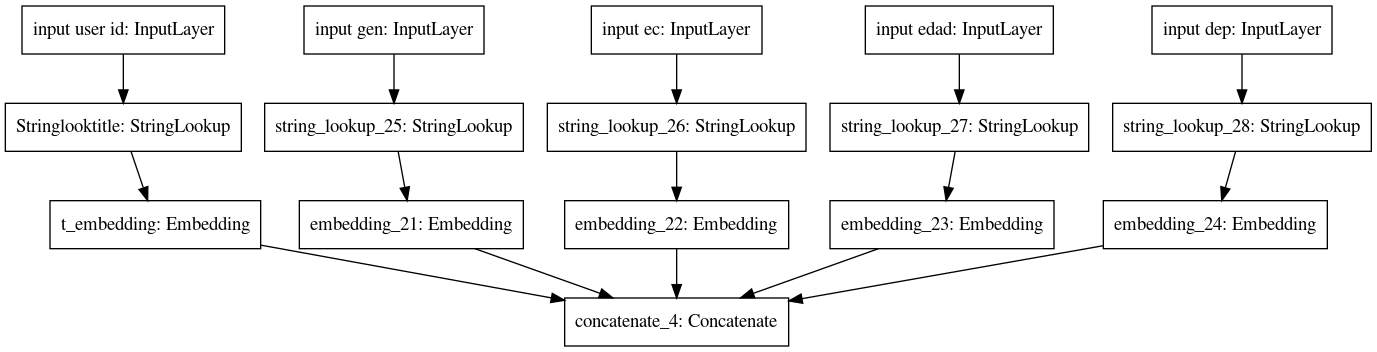

In [65]:
max_tokens = 10_000
inp_genero = tf.keras.Input(dtype="string",shape=1,name="input gen")
gen_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=gen, mask_token=None) (inp_genero)
gen_embedding =tf.keras.layers.Embedding(len(gen) + 1, 32)(gen_lookup)
gen_embed_model = tf.keras.models.Model(inputs=inp_genero, outputs=gen_embedding)


inp_ec = tf.keras.Input(dtype="string",shape=1,name="input ec")
ec_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=EC, mask_token=None) (inp_ec)
ec_embedding =tf.keras.layers.Embedding(len(EC) + 1, 32)(ec_lookup)
ec_embed_model = tf.keras.models.Model(inputs=inp_ec, outputs=ec_embedding)

inp_edad = tf.keras.Input(dtype="string",shape=1,name="input edad")
edad_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=ED, mask_token=None) (inp_edad)
edad_embedding =tf.keras.layers.Embedding(len(ED) + 1, 32)(edad_lookup)
edad_embed_model = tf.keras.models.Model(inputs=inp_edad, outputs=edad_embedding)

inp_dep = tf.keras.Input(dtype="string",shape=1,name="input dep")
dep_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=DE, mask_token=None) (inp_dep)
dep_embedding =tf.keras.layers.Embedding(len(DE) + 1, 32)(dep_lookup)
dep_embed_model = tf.keras.models.Model(inputs=inp_dep, outputs=dep_embedding)
#print(gen_embed_model.summary())
concatval = tf.keras.layers.concatenate([user_embedding,gen_embedding,ec_embedding,edad_embedding,dep_embedding],axis=-1)
#tf.keras.layers.Concatenate(
#    axis=-1
#)
concatmodel = tf.keras.models.Model(inputs=[inp_user_id,inp_genero,inp_ec,inp_edad,inp_dep], outputs=concatval)

#print(concatmodel.summary())
tf.keras.utils.plot_model(concatmodel)

In [68]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(1_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(8_000)
test = shuffled.skip(8_000).take(2_000)

cached_train = train.shuffle(1_000).batch(204)
cached_test = test.batch(406).cache()
a_dict= dict(tfds.as_dataframe(shuffled.take(1)).loc[0])
b_dict=tfds.as_dataframe(shuffled.take(1))[["user_id","GENERO","EDO_CIVIL","edad","NDepen"]].loc[0]
value = tf.constant(b_dict["user_id"])
value2 = tf.constant(b_dict["GENERO"])
value3=tf.constant(b_dict["EDO_CIVIL"])
value4=tf.constant(b_dict["edad"])
value5=tf.constant(b_dict["NDepen"])

print(concatmodel([value,value2,value3,value4,value5]))


tf.Tensor(
[ 0.01484957  0.0371762   0.00116803  0.04370042 -0.03302281 -0.00038224
  0.01100907  0.04120759 -0.00936949 -0.02489405 -0.04534535  0.04641132
  0.03007064 -0.00165264  0.03366647  0.03207744  0.04851233 -0.01903732
  0.03443864 -0.02085137  0.00786513  0.03585051 -0.04582809  0.03221989
  0.02620566  0.0246104  -0.00530493 -0.0440976   0.04507745  0.043683
  0.04508486 -0.02442918 -0.04254761  0.02819357  0.03071045 -0.02522045
 -0.02245313  0.02083825 -0.00691161  0.02587266 -0.02009915 -0.0041502
  0.03394106  0.01328966 -0.01660222 -0.01875567 -0.03026429  0.03251083
 -0.04175396  0.01758167  0.03216514 -0.00834086 -0.04082028 -0.00550546
 -0.04069304  0.02733028  0.00502305  0.02817116  0.03776347 -0.00790826
  0.02053496 -0.03683021 -0.00472746 -0.04828333 -0.02853392  0.02182691
  0.04013523  0.0382192   0.04365038 -0.00778411 -0.04602093 -0.01085379
 -0.04769647  0.04409285  0.04175407  0.04739923  0.02064773 -0.01303773
  0.00752265  0.00090659 -0.02960445 -0.010

In [69]:
max_tokens = 10_000
inp_user_id = tf.keras.Input(dtype="string",shape=1,name="input user id")
#Categoria = tf.keras.Input(dtype="string",shape=1)
#Familia = tf.keras.Input(dtype="string",shape=1)
user_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary =unique_user_ids, mask_token=None,name ="Stringlooktitle")(inp_user_id)

user_embedding =  tf.keras.layers.Embedding(len(unique_user_ids) + 1, 32,name="t_embedding")(user_lookup)
user_embed_model = tf.keras.models.Model(inputs=inp_user_id, outputs=user_embedding)
print(title_embed_model.summary())




cat_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=cat, mask_token=None) (Categoria)
cat_embedding =tf.keras.layers.Embedding(len(cat) + 1, 32)(cat_lookup)
cat_embed_model = tf.keras.models.Model(inputs=Categoria, outputs=cat_embedding)
print(title_embed_model.summary())
concatval = tf.keras.layers.concatenate([title_embedding,cat_embedding],axis=-1)
#tf.keras.layers.Concatenate(
#    axis=-1
#)
concatmodel = tf.keras.models.Model(inputs=[inp_movie_id,Categoria], outputs=concatval)

print(concatmodel.summary())

tf.random.set_seed(42)
shuffled = ratings.shuffle(1_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(8_000)
test = shuffled.skip(8_000).take(2_000)

cached_train = train.shuffle(1_000).batch(204)
cached_test = test.batch(406).cache()
a_dict= dict(tfds.as_dataframe(shuffled.take(1)).loc[0])
b_dict=tfds.as_dataframe(shuffled.take(1))[["movie_id","Categoria","Familia"]].loc[0]
value = tf.constant(b_dict["movie_id"])
value2 = tf.constant(b_dict["Categoria"])

print(concatmodel([value,value2]))

#concatmodel = tf.keras.models.Model(inputs=[inp_movie_id,Categoria], outputs=title_embedding)
#concatmodel.summary()

#tf.keras.utils.plot_model(title_embed_model)
#tf.keras.layers.Concatenate(
#    axis=-1
#)


tf.keras.utils.plot_model(concatmodel)

NameError: name 'title_embed_model' is not defined

In [ ]:
class MovieModel(tf.keras.Model):
  
  def __init__(self,use_timestamps):
    super().__init__()
    self._use_timestamps = use_timestamps
    max_tokens = 10_000
    self.inp_movie_id = tf.keras.Input(dtype="string",shape=3)
    self.title_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
          vocabulary =unique_movie_titles, mask_token=None,name ="Stringlooktitle")(self.inp_movie_id)
    self.title_embedding =  tf.keras.layers.Embedding(len(unique_movie_titles) + 1, 32,name="t_embedding")(self.title_lookup)

    
    self.title_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
        max_tokens=max_tokens)


    
    self.intermediate_model = tf.keras.Sequential([
      self.title_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 32, mask_zero=True),
    ])
    self.title_text_embedding = self.intermediate_model

    #self.title_vectorizer.adapt(movies)
    self.title_vectorizer.adapt(ratings.map(lambda x: x["movie_id"]))
    if use_timestamps:
        self.cat_embedding = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=cat, mask_token=None),
        tf.keras.layers.Embedding(len(cat) + 1, 32)
        ])
        
        self.fam_embedding = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=fam, mask_token=None),
        tf.keras.layers.Embedding(len(fam) + 1, 32)
        ])
  self.title_embedding =tf.keras.Models(input=self.inp_movie_id,output=self.title_embedding)    
   # def call(self, inputs):
    #if not self._use_timestamps:
     # return self.title_embedding(titles["movie_id"]),
      #  self.title_text_embedding(titles["movie_id"])
    
  def call(self, titles):
    if not self._use_timestamps:
      return self.title_embedding(titles["movie_id"]) #tf.concat([
#self.title_embedding(titles["movie_id"]),
 #           self.title_text_embedding(titles["movie_id"]),
  #      ], axis=1)

      #tf.print(titles["movie_id"])
    return tf.concat([
            self.title_embedding(titles.map(lambda x:x["movie_id"])),
            #self.title_text_embedding(titles["movie_id"]),
            self.cat_embedding(titles.map(lambda x:x["Categoria"])),
            self.fam_embedding(titles.map(lambda x:x["Familia"]))
            ], axis=1)

In [ ]:
max_tokens = 10_000
inp_movie_id = tf.keras.Input(dtype="string",shape=1,name="input movie id")
Categoria = tf.keras.Input(dtype="string",shape=1)
Familia = tf.keras.Input(dtype="string",shape=1)
title_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary =unique_movie_titles, mask_token=None,name ="Stringlooktitle")(inp_movie_id)

title_embedding =  tf.keras.layers.Embedding(len(unique_movie_titles) + 1, 32,name="t_embedding")(title_lookup)
title_embed_model = tf.keras.models.Model(inputs=inp_movie_id, outputs=title_embedding)
print(title_embed_model.summary())
cat_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=cat, mask_token=None) (Categoria)
cat_embedding =tf.keras.layers.Embedding(len(cat) + 1, 32)(cat_lookup)
cat_embed_model = tf.keras.models.Model(inputs=Categoria, outputs=cat_embedding)
print(title_embed_model.summary())
concatval = tf.keras.layers.concatenate([title_embedding,cat_embedding],axis=-1)
#tf.keras.layers.Concatenate(
#    axis=-1
#)
concatmodel = tf.keras.models.Model(inputs=[inp_movie_id,Categoria], outputs=concatval)

print(concatmodel.summary())

tf.random.set_seed(42)
shuffled = ratings.shuffle(1_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(8_000)
test = shuffled.skip(8_000).take(2_000)

cached_train = train.shuffle(1_000).batch(204)
cached_test = test.batch(406).cache()
a_dict= dict(tfds.as_dataframe(shuffled.take(1)).loc[0])
b_dict=tfds.as_dataframe(shuffled.take(1))[["movie_id","Categoria","Familia"]].loc[0]
value = tf.constant(b_dict["movie_id"])
value2 = tf.constant(b_dict["Categoria"])

print(concatmodel([value,value2]))

#concatmodel = tf.keras.models.Model(inputs=[inp_movie_id,Categoria], outputs=title_embedding)
#concatmodel.summary()

#tf.keras.utils.plot_model(title_embed_model)
#tf.keras.layers.Concatenate(
#    axis=-1
#)


tf.keras.utils.plot_model(concatmodel)

In [ ]:
class MovieModel(tf.keras.Model):
  
  def __init__(self,use_timestamps):
    super().__init__()
    self._use_timestamps = use_timestamps
    max_tokens = 10_000

    self.title_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
          vocabulary=unique_movie_titles, mask_token=None),
      tf.keras.layers.Embedding(len(unique_movie_titles) + 1, 32)
    ])
    
    self.title_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
        max_tokens=max_tokens)

    self.title_text_embedding = tf.keras.Sequential([
      self.title_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 32, mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D(),
    ])

    #self.title_vectorizer.adapt(movies)
    self.title_vectorizer.adapt(ratings.map(lambda x: x["movie_id"]))
    if use_timestamps:
        self.cat_embedding = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=cat, mask_token=None),
        tf.keras.layers.Embedding(len(cat) + 1, 32)
        ])
        
        self.fam_embedding = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=fam, mask_token=None),
        tf.keras.layers.Embedding(len(fam) + 1, 32)
        ])
    
   # def call(self, inputs):
    #if not self._use_timestamps:
     # return self.title_embedding(titles["movie_id"]),
      #  self.title_text_embedding(titles["movie_id"])
    
  def call(self, titles):
    if not self._use_timestamps:
      return tf.concat([
            self.title_embedding(titles["movie_id"]),
            self.title_text_embedding(titles["movie_id"]),
        ], axis=1)

      #tf.print(titles["movie_id"])
    return tf.concat([
            self.title_embedding(titles["movie_id"]),
            self.title_text_embedding(titles["movie_id"]),
            self.cat_embedding(titles["Categoria"]),
            self.fam_embedding(titles["Familia"])
            ], axis=1)

In [ ]:
class MovielensModel(tfrs.models.Model):

  def __init__(self, use_timestamps):
    super().__init__()
    self.query_model = tf.keras.Sequential([
      UserModel(use_timestamps),
      tf.keras.layers.Dense(32)
    ])
    self.candidate_model = tf.keras.Sequential([
      MovieModel(use_timestamps),
      tf.keras.layers.Dense(32)
    ])
    self.task = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=movies.batch(128).map(self.candidate_model),
        ),
    )

  def compute_loss(self, features, training=False):
    # We only pass the user id and timestamp features into the query model. This
    # is to ensure that the training inputs would have the same keys as the
    # query inputs. Otherwise the discrepancy in input structure would cause an
    # error when loading the query model after saving it.
    query_embeddings = self.query_model({
        "user_id": features["user_id"],
        "GENERO": features["GENERO"],
        "EDO_CIVIL": features["EDO_CIVIL"],
        "edad": features["edad"],
         "NDepen": features["NDepen"],
         "TP_HOGAR": features["TP_HOGAR"]
                                            })
    #movie_embeddings = self.candidate_model(features["movie_id"])
    
    movie_embeddings = self.candidate_model({
       "movie_id": features["movie_id"],
       "Categoria": features["Categoria"],
        "Familia": features["Familia"]
                                                 
                                                 })
    
    #movie_embeddings = self.candidate_model(features["movie_title"])

    return self.task(query_embeddings, movie_embeddings)

In [ ]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(1_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(8_000)
test = shuffled.skip(8_000).take(2_000)

cached_train = train.shuffle(1_000).batch(204)
cached_test = test.batch(406).cache()

In [ ]:
model = MovielensModel(use_timestamps=False)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

model.fit(cached_train, epochs=3)

train_accuracy = model.evaluate(
    cached_train, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]
test_accuracy = model.evaluate(
    cached_test, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]

print(f"Top-100 accuracy (train): {train_accuracy:.2f}.")
print(f"Top-100 accuracy (test): {test_accuracy:.2f}.")

In [ ]:
model = MovielensModel(use_timestamps=True)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

model.fit(cached_train, epochs=3)

train_accuracy = model.evaluate(
    cached_train, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]
test_accuracy = model.evaluate(
    cached_test, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]

print(f"accuracy (train): {train_accuracy:.2f}.")
print(f"accuracy (test): {test_accuracy:.2f}.")

In [ ]:
model.evaluate(cached_test, return_dict=True)

In [ ]:
# Create a model that takes in raw query features, and
index = tfrs.layers.factorized_top_k.BruteForce(model.query_model)
# recommends movies out of the entire movies dataset.
index.index(movies.map(lambda x: x["movie_id"]).batch(100).map(model.candidate_model), movies.map(lambda x: x["movie_id"]))

# Get recommendations.
#_, titles = index(tf.constant(["42"]))
#print(f"Recommendations for user 42: {titles[0, :3]}")

In [ ]:
scann_index = tfrs.layers.factorized_top_k.ScaNN(model.query_model)
scann_index.index(movies.batch(100).map(model.candidate_model), movies)